In [33]:
import pandas as pd
from pandas import datetime
import numpy as np
from datetime import timedelta
from statsmodels.tsa.arima_model import ARMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from time import time
import matplotlib.pyplot as plt

C:\Users\JESAL\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [13]:
def parser(s):
    return datetime.strptime(s,'%Y-%m-%d')

In [14]:
df=pd.read_csv('https://raw.githubusercontent.com/ritvikmath/Time-Series-Analysis/master/ice_cream.csv',header=0,names=['Date','Production'],parse_dates=[0],index_col=0,date_parser=parser,squeeze=True)

In [16]:
df

Date
1972-01-01     59.9622
1972-02-01     67.0605
1972-03-01     74.2350
1972-04-01     78.1120
1972-05-01     84.7636
                ...   
2019-09-01    100.1741
2019-10-01     90.1684
2019-11-01     79.7223
2019-12-01     75.7094
2020-01-01     83.6290
Name: Production, Length: 577, dtype: float64

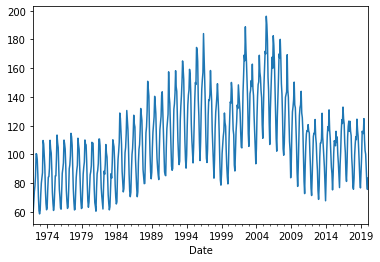

In [17]:
df.plot()

In [18]:
#just get the data from 2010 onwards

In [19]:
startdate=pd.to_datetime('2010-01-01')
ice=df[startdate:]

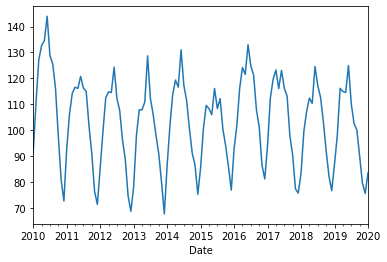

In [20]:
ice.plot()

# ACF

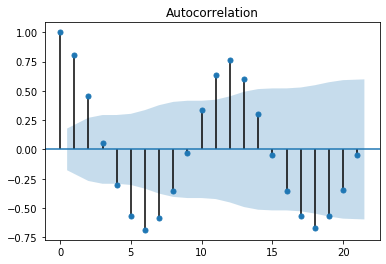

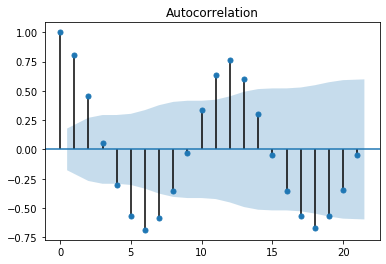

In [21]:
plot_acf(ice)

# Based on decaying ACF, we are likely dealing with an Auto Regressive process

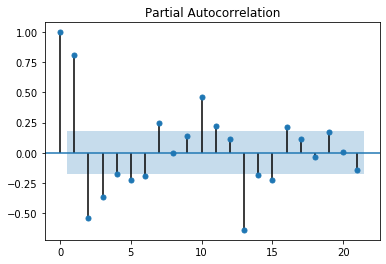

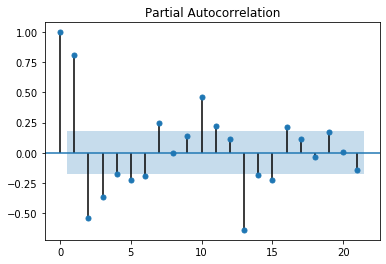

In [22]:
plot_pacf(ice)

# Based on PACF, we should start with an Auto Regressive model with lags 1, 2, 3, 10, 13

# Getting train and test data

In [44]:
trainend=datetime(2018,12,1)
testend=datetime(2019,12,1)
traindata=ice[:trainend]
testdata=ice[trainend+timedelta(days=1):testend]

# Fit AR Model

In [61]:
#create model
model=ARMA(traindata,order=(7,0))


C:\Users\JESAL\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [62]:
#fit the model
start=time()
modelfit=model.fit()
end=time()
print('model fitting time',end-start)

model fitting time 1.506824016571045


In [63]:
#check the summary
print(modelfit.summary())

                              ARMA Model Results                              
Dep. Variable:             Production   No. Observations:                  108
Model:                     ARMA(7, 0)   Log Likelihood                -361.526
Method:                       css-mle   S.D. of innovations              6.754
Date:                Wed, 19 Aug 2020   AIC                            741.051
Time:                        22:35:58   BIC                            765.191
Sample:                    01-01-2010   HQIC                           750.839
                         - 12-01-2018                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              103.6216      1.159     89.389      0.000     101.350     105.894
ar.L1.Production     0.9497      0.092     10.267      0.000       0.768       1.131
ar.L2.Production    -0.0964 

In [64]:
#get prediction start and end
startpred=testdata.index[0]
endpred=testdata.index[-1]


In [65]:
prediction=modelfit.predict(start=startpred,end=endpred)
residuals=testdata-prediction

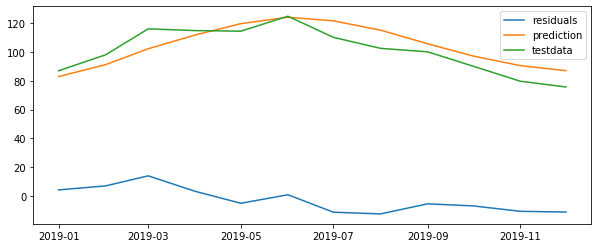

In [68]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.plot(prediction)
plt.plot(testdata)
plt.legend(('residuals','prediction','testdata'))

In [70]:
print('mean ablsoute % erro',round(np.mean(abs(residuals/testdata)),4))

mean ablsoute % erro 0.0802


In [72]:
print('root mean square error:',np.sqrt(np.mean(residuals**2)))

root mean square error: 8.725149838631507
